In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
df = pd.read_excel('dataURG.xlsx', header=None, names=["admission", "sortie", "date de naissance", "spécialité"])
df.drop_duplicates(inplace=True)
len(df)

42736

In [3]:
df.head(10)

,admission,sortie,date de naissance,spécialité
0,2024-01-03 20:11:00,2024-01-04 02:00:00,1995-06-17,CHIR
1,2024-01-03 06:23:00,2024-01-03 07:29:00,1985-12-18,CHIR
2,2024-01-01 00:39:00,2024-01-01 03:09:00,2021-08-05,PED
3,2024-01-01 22:31:00,2024-01-02 01:44:00,1942-06-26,MED
4,2024-01-02 23:41:00,2024-01-03 04:30:00,1983-06-27,CHIR
5,2024-01-01 23:10:00,2024-01-02 03:04:00,1962-02-22,MED
6,2024-01-03 17:40:00,2024-01-03 22:21:00,1938-10-06,CHIR
7,2024-01-01 15:03:00,2024-01-01 16:49:00,1979-08-20,CHIR
8,2024-01-03 13:48:00,2024-01-04 00:33:00,1997-02-04,MED
9,2024-01-03 23:24:00,2024-01-04 00:09:00,2018-08-03,PED


In [4]:
df['admission'] = pd.to_datetime(df['admission'])

df['date admission'] = df['admission'].dt.date
df['heure admission'] = df['admission'].dt.time

df['sortie'] = pd.to_datetime(df['sortie'])

df['date sortie'] = df['sortie'].dt.date
df['heure sortie'] = df['sortie'].dt.time

df.head()

,admission,sortie,date de naissance,spécialité,date admission,heure admission,date sortie,heure sortie
0,2024-01-03 20:11:00,2024-01-04 02:00:00,1995-06-17,CHIR,2024-01-03,20:11:00,2024-01-04,02:00:00
1,2024-01-03 06:23:00,2024-01-03 07:29:00,1985-12-18,CHIR,2024-01-03,06:23:00,2024-01-03,07:29:00
2,2024-01-01 00:39:00,2024-01-01 03:09:00,2021-08-05,PED,2024-01-01,00:39:00,2024-01-01,03:09:00
3,2024-01-01 22:31:00,2024-01-02 01:44:00,1942-06-26,MED,2024-01-01,22:31:00,2024-01-02,01:44:00
4,2024-01-02 23:41:00,2024-01-03 04:30:00,1983-06-27,CHIR,2024-01-02,23:41:00,2024-01-03,04:30:00


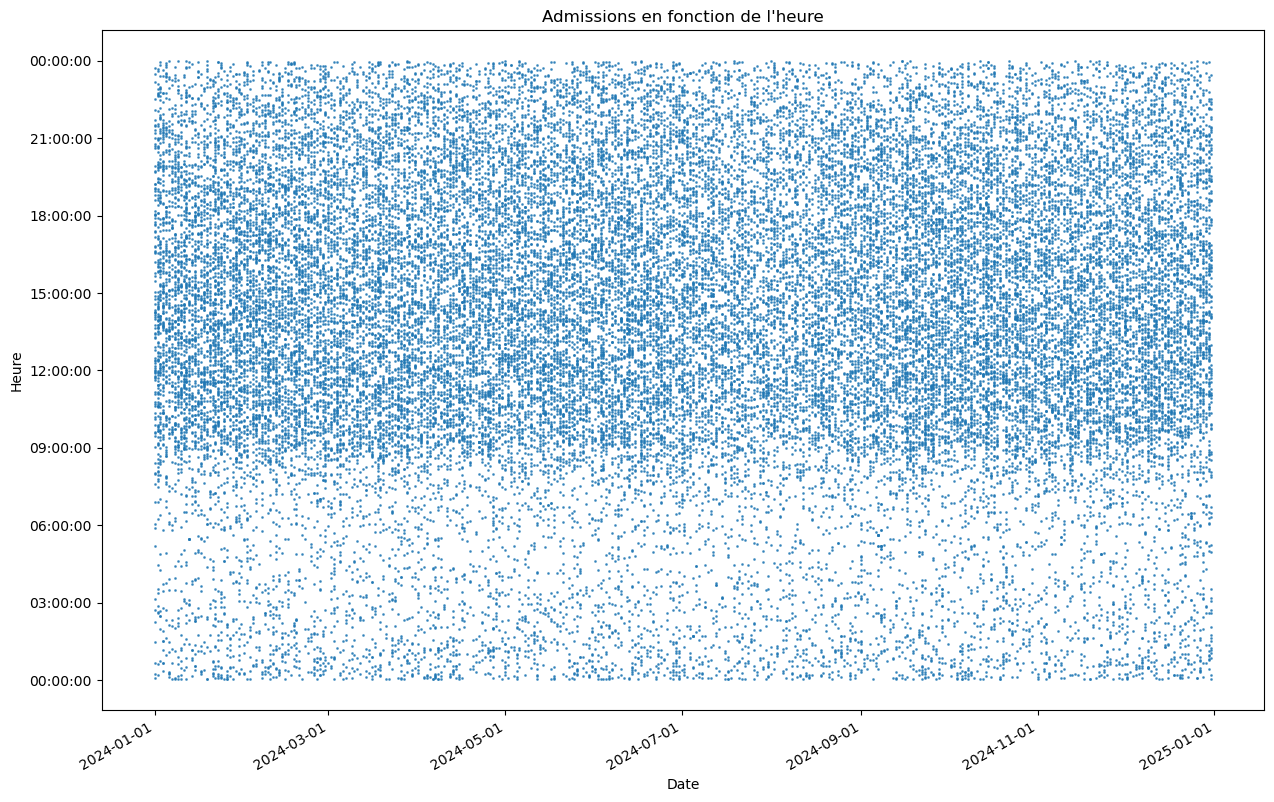

In [5]:
# Convertir la colonne 'date' en datetime
df['date admission'] = pd.to_datetime(df['date admission'], format='%Y-%m-%d')

# Convertir la colonne 'heure' en datetime (la date par défaut sera 1900-01-01)
df['heure admission'] = pd.to_datetime(df['heure admission'], format='%H:%M:%S')

# 2. Création du nuage de points
fig, ax = plt.subplots(figsize=(15, 10))

# Tracer les points
ax.scatter(df['date admission'], df['heure admission'], s=1, alpha=0.7)

# Format de l'axe des x : afficher la date au format souhaité
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()  # pour une rotation automatique des labels des dates

# Format de l'axe des y : afficher uniquement l'heure (en utilisant DateFormatter)
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Ajouter des labels et un titre
plt.xlabel('Date')
plt.ylabel('Heure')
plt.title("Admissions en fonction de l'heure")

plt.show()

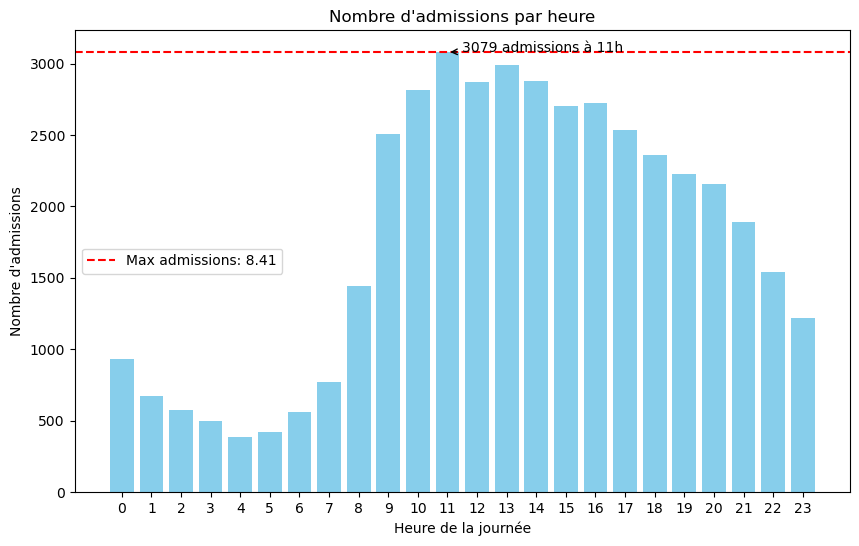

In [6]:
# Extraction de l'heure (en entier, par exemple 6, 14, 9, etc.)
df['heure admission extraite'] = df['heure admission'].dt.hour

# Comptage du nombre de patients par heure
nombre_par_heure = df.groupby('heure admission extraite').size()

# Récupérer la valeur maximale et l'heure correspondante
max_value = nombre_par_heure.max()
max_hour = nombre_par_heure.idxmax()

# Création du graphique en barres
plt.figure(figsize=(10,6))
plt.bar(nombre_par_heure.index, nombre_par_heure.values, color='skyblue')
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre d'admissions")
plt.title("Nombre d'admissions par heure")

# Ajouter une ligne horizontale indiquant le nombre maximal d'admissions
plt.axhline(y=max_value, color='red', linestyle='--', label=f'Max admissions: {round(max_value/366, 2)}')

# Annoter le bar correspondant à l'heure maximale (optionnel)
plt.annotate(f'{max_value} admissions à {max_hour}h',
             xy=(max_hour, max_value), 
             xytext=(max_hour + 0.5, max_value - 0.5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.xticks(range(0, 24))  # Afficher toutes les heures de 0 à 23
plt.legend()
plt.show()

In [7]:
df['jour admission'] = df['admission'].dt.dayofweek
df.head()

,admission,sortie,date de naissance,spécialité,date admission,heure admission,date sortie,heure sortie,heure admission extraite,jour admission
0,2024-01-03 20:11:00,2024-01-04 02:00:00,1995-06-17,CHIR,2024-01-03,1900-01-01 20:11:00,2024-01-04,02:00:00,20,2
1,2024-01-03 06:23:00,2024-01-03 07:29:00,1985-12-18,CHIR,2024-01-03,1900-01-01 06:23:00,2024-01-03,07:29:00,6,2
2,2024-01-01 00:39:00,2024-01-01 03:09:00,2021-08-05,PED,2024-01-01,1900-01-01 00:39:00,2024-01-01,03:09:00,0,0
3,2024-01-01 22:31:00,2024-01-02 01:44:00,1942-06-26,MED,2024-01-01,1900-01-01 22:31:00,2024-01-02,01:44:00,22,0
4,2024-01-02 23:41:00,2024-01-03 04:30:00,1983-06-27,CHIR,2024-01-02,1900-01-01 23:41:00,2024-01-03,04:30:00,23,1


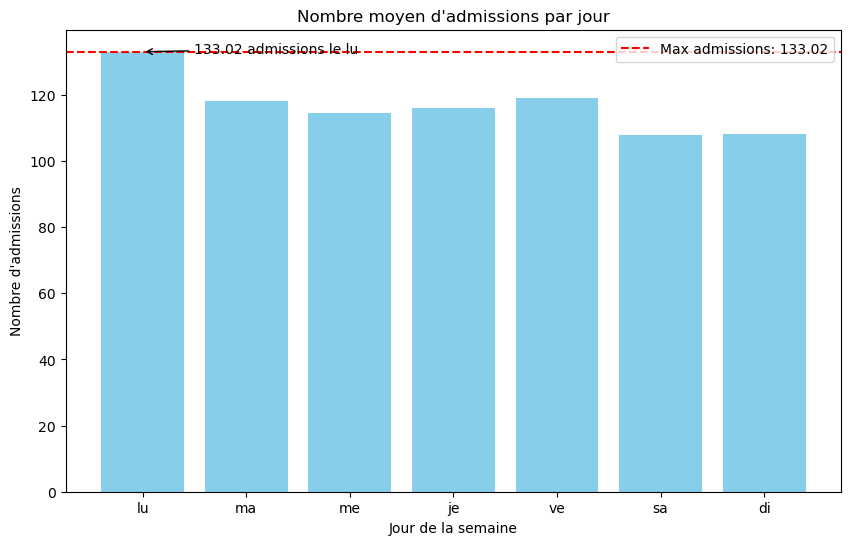

In [8]:
df['jour admission'] = df['admission'].dt.dayofweek

nombre_chaque_jour = df.groupby('jour admission').size()

date_range = pd.date_range(start='1/1/2024', periods=366)
num_days = date_range.dayofweek.value_counts()

moy_chaque_jour = pd.concat([nombre_chaque_jour, num_days], axis=1)
moy_chaque_jour["moyenne"] = round(moy_chaque_jour[0] / moy_chaque_jour["count"], 2)
moy_chaque_jour["jour"] = ["lu", "ma", "me", "je", "ve", "sa", "di"]

max_value = moy_chaque_jour["moyenne"].max()
max_index = moy_chaque_jour["moyenne"].idxmax()
max_day = moy_chaque_jour.loc[max_index]["jour"]

plt.figure(figsize=(10,6))
plt.bar(moy_chaque_jour["jour"], moy_chaque_jour["moyenne"], color='skyblue')
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre d'admissions")
plt.title("Nombre moyen d'admissions par jour")

plt.axhline(y=max_value, color='red', linestyle='--', label=f'Max admissions: {max_value}')

plt.annotate(f'{max_value} admissions le {max_day}',
             xy=(max_day, max_value), 
             xytext=(max_index + 0.5, max_value - 0.5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.xticks(range(0, 7)) 
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


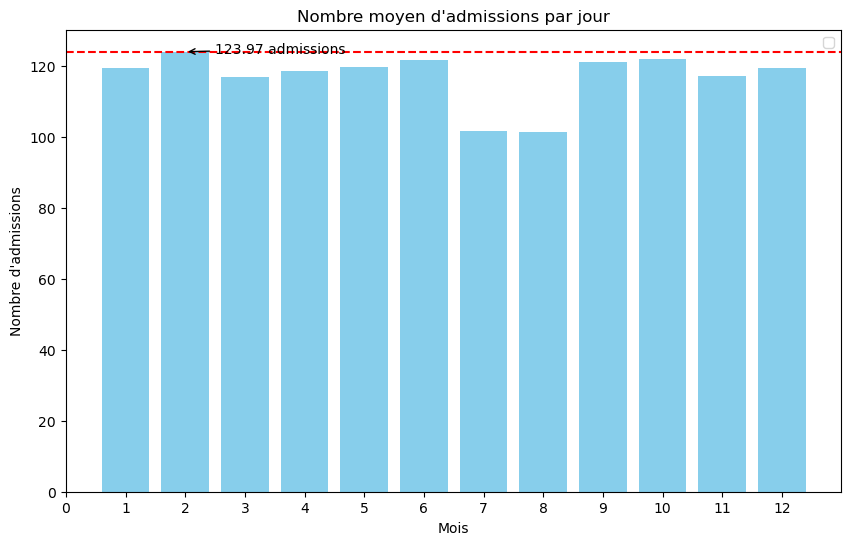

In [9]:
df['mois admission'] = df['admission'].dt.month

nombre_chaque_mois = df.groupby('mois admission').size()

date_range = pd.date_range(start='1/1/2024', periods=366)
num_days = date_range.month.value_counts()

moy_chaque_mois = pd.concat([nombre_chaque_mois, num_days], axis=1)
moy_chaque_mois["moyenne"] = round(moy_chaque_mois[0] / moy_chaque_mois["count"], 2)

max_value = moy_chaque_mois["moyenne"].max()
max_index = moy_chaque_mois["moyenne"].idxmax()

plt.figure(figsize=(10,6))
plt.bar(moy_chaque_mois.index, moy_chaque_mois["moyenne"], color='skyblue')
plt.xlabel("Mois")
plt.ylabel("Nombre d'admissions")
plt.title("Nombre moyen d'admissions par jour")

plt.axhline(y=max_value, color='red', linestyle='--')

plt.annotate(f'{max_value} admissions',
             xy=(max_index, max_value), 
             xytext=(max_index + 0.5, max_value - 0.5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

plt.xticks(range(0, 13)) 
plt.legend()
plt.show()

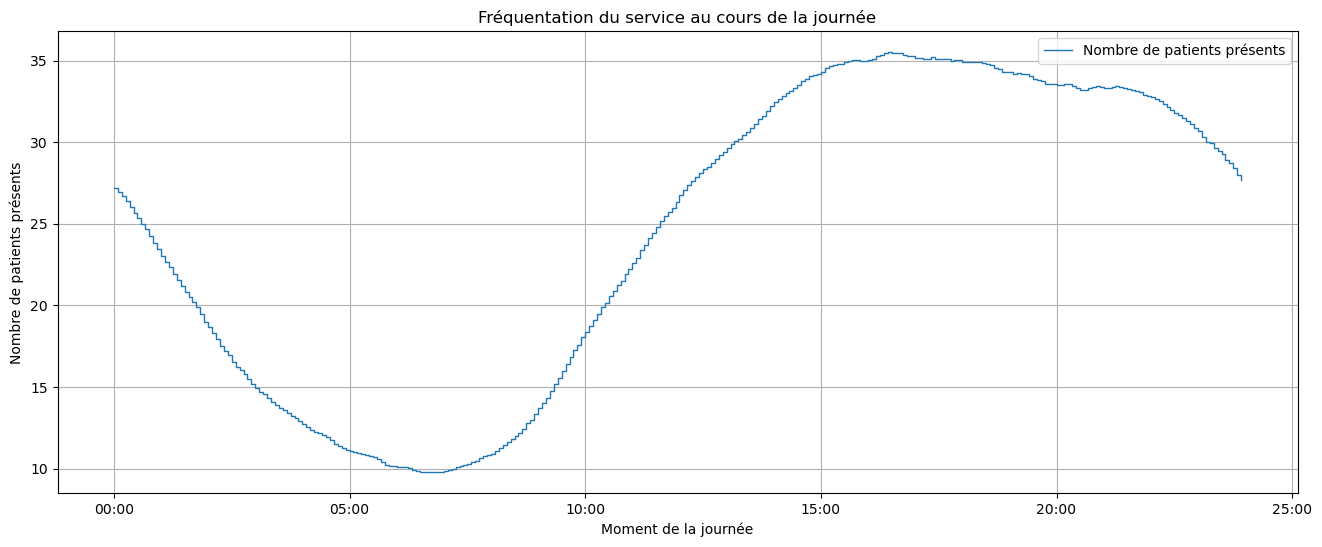

In [10]:
num_min = 5
time_interval = f"{num_min}min"
time_range = pd.date_range(start='1/1/2024', periods=round(366*24*60/num_min), freq=time_interval)
occupancy = [((df["admission"] <= t) & (df["sortie"] > t)).sum() for t in time_range]
time_range_hour = [t.hour + t.minute/60 for t in time_range]

df_occupancy = pd.DataFrame(data={ "time" : time_range_hour, "occupancy": occupancy})
df_mean_occupancy = df_occupancy.groupby("time").mean()
df_mean_occupancy["time"] = df_mean_occupancy.index


plt.figure(figsize=(16, 6))
plt.step(df_mean_occupancy["time"], df_mean_occupancy['occupancy'], where='post', label='Nombre de patients présents', linewidth=1)
plt.xlabel("Moment de la journée")
plt.ylabel("Nombre de patients présents")
plt.title("Fréquentation du service au cours de la journée")
plt.legend()
plt.grid(True)

def format_time(x, pos):
    hours = int(x)
    minutes = int(round((x - hours) * 60))
    return f"{hours:02d}:{minutes:02d}"

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.show()


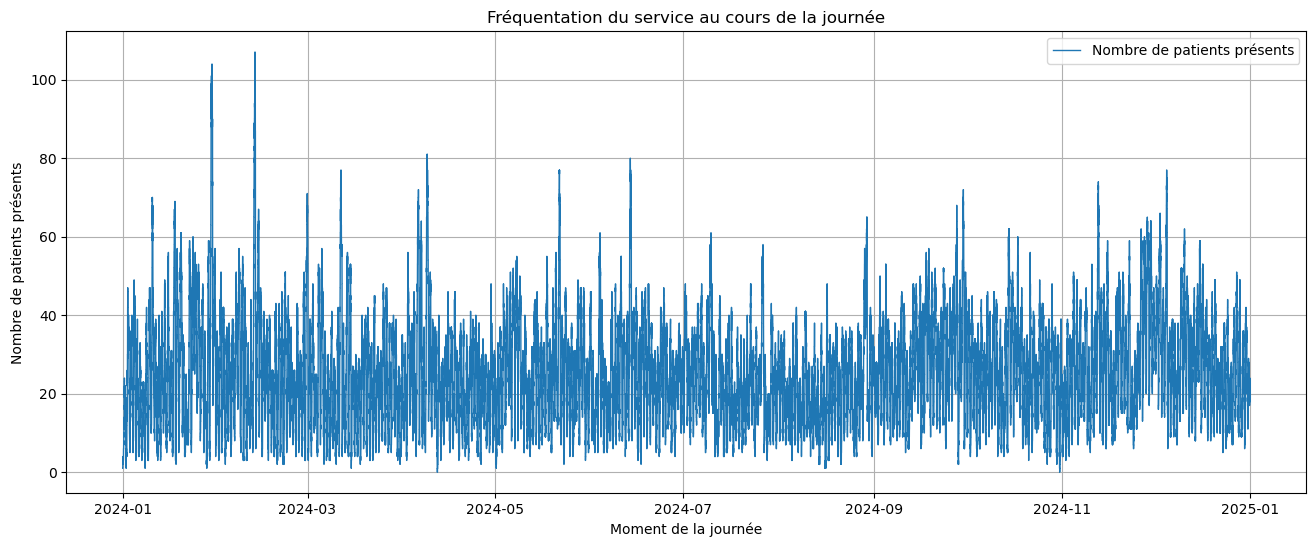

In [11]:
entree_events = df[['admission']].copy().rename(columns={'admission': 'time'})
entree_events['change'] = 1

sortie_events = df[['sortie']].copy().rename(columns={'sortie': 'time'})
sortie_events['change'] = -1

events = pd.concat([entree_events, sortie_events]).sort_values('time')
events = events[events["time"] < "2025-01-01"]

events['occupancy'] = events['change'].cumsum()

plt.figure(figsize=(16, 6))
plt.step(events['time'], events['occupancy'], where='post', label='Nombre de patients présents', linewidth=1)
plt.xlabel("Moment de la journée")
plt.ylabel("Nombre de patients présents")
plt.title("Fréquentation du service au cours de la journée")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\Martin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


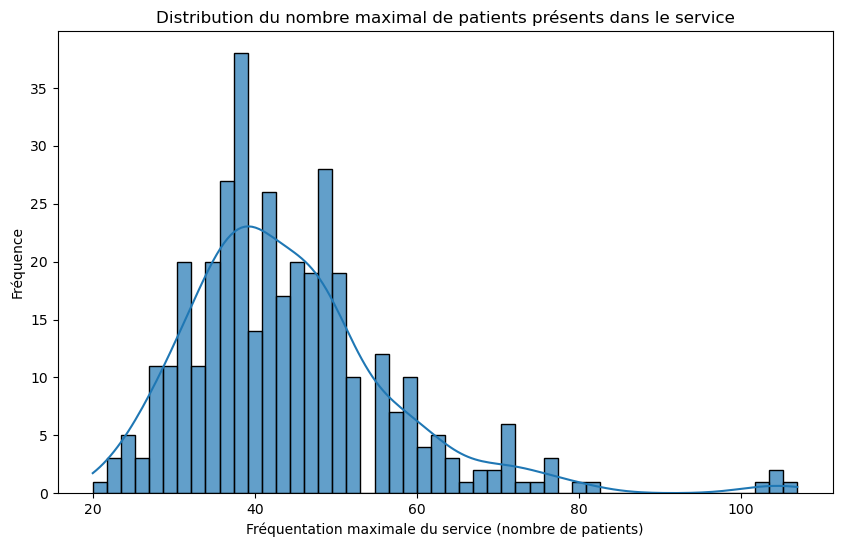

In [12]:
events["date"] = events['time'].dt.date
events["hour"] = events['time'].dt.hour

max_occupancy_each_day = events.groupby('date')['occupancy'].max()

plt.figure(figsize=(10, 6))
sns.histplot(max_occupancy_each_day, bins=50, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel("Fréquentation maximale du service (nombre de patients)")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre maximal de patients présents dans le service")

plt.show()


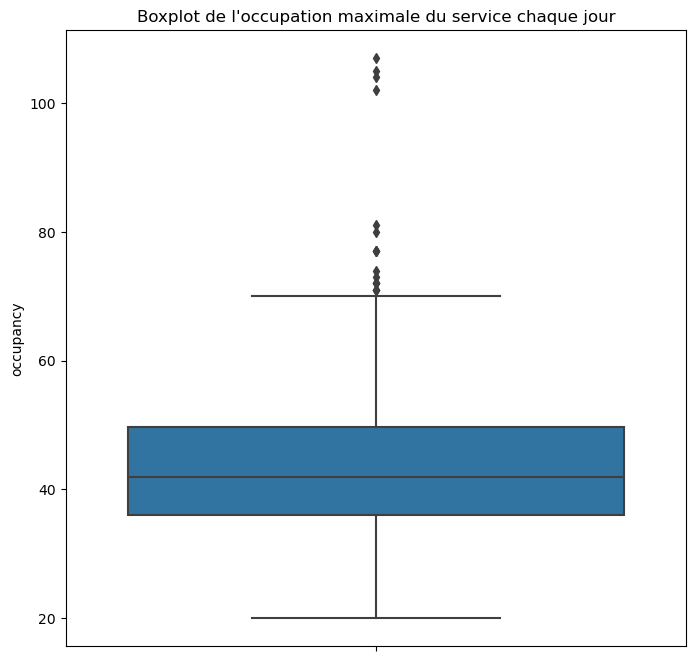

In [13]:
plt.figure(figsize=(8, 8))
sns.boxplot(y=max_occupancy_each_day)
plt.title("Boxplot de l'occupation maximale du service chaque jour")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


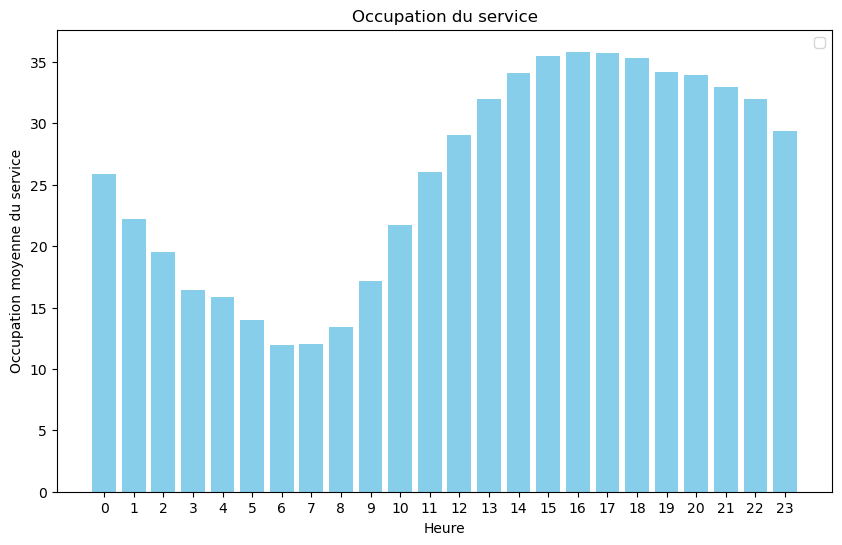

In [14]:
mean_occupancy_each_hour = events.groupby('hour')['occupancy'].mean()

plt.figure(figsize=(10,6))
plt.bar(mean_occupancy_each_hour.index, mean_occupancy_each_hour, color='skyblue')
plt.xlabel("Heure")
plt.ylabel("Occupation moyenne du service")
plt.title("Occupation du service")

plt.xticks(range(0, 24)) 
plt.legend()
plt.show()

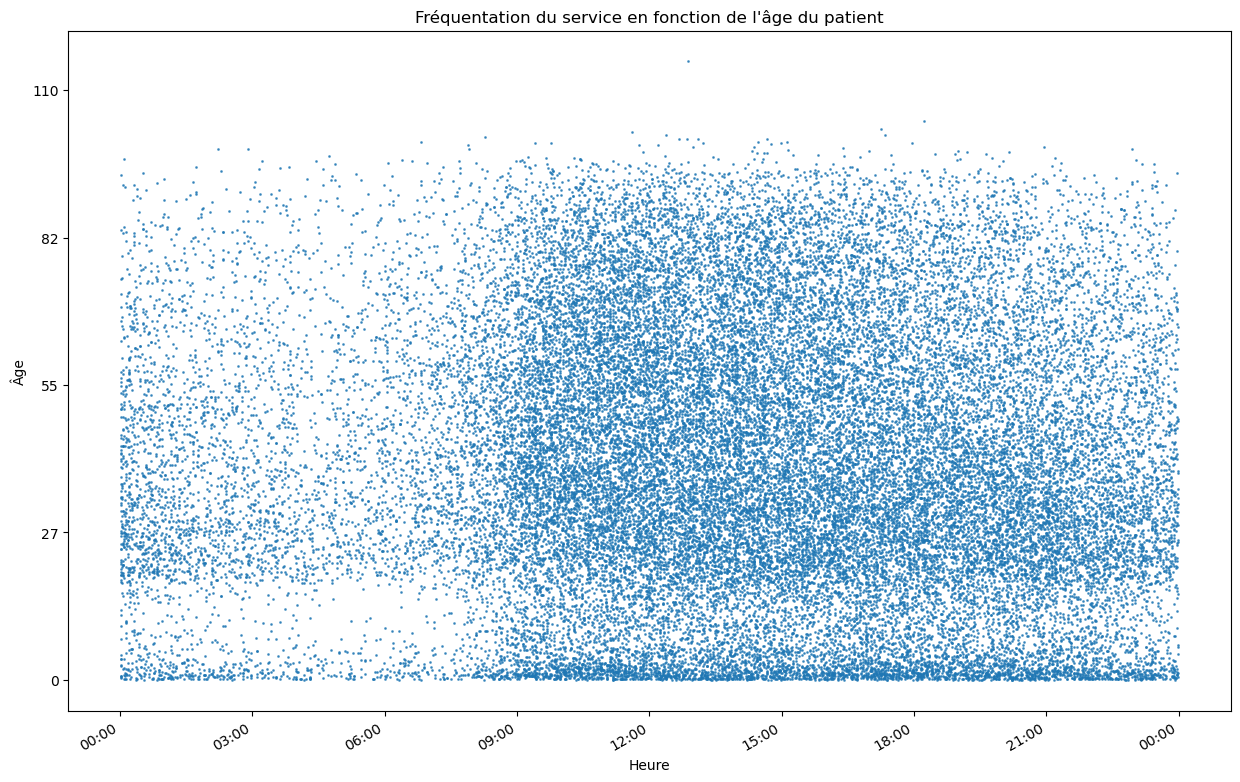

In [15]:
df['age_days'] = np.floor((df.admission - df["date de naissance"]).dt.days)
df['age'] = np.floor(df["age_days"] / 365.25)
masked_df = df[df["age"] < 120]

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(masked_df['heure admission'], masked_df['age_days'], s=1, alpha=0.7)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate() 

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: round(x/365.25)))

plt.xlabel('Heure')
plt.ylabel('Âge')
plt.title("Fréquentation du service en fonction de l'âge du patient")

plt.show()

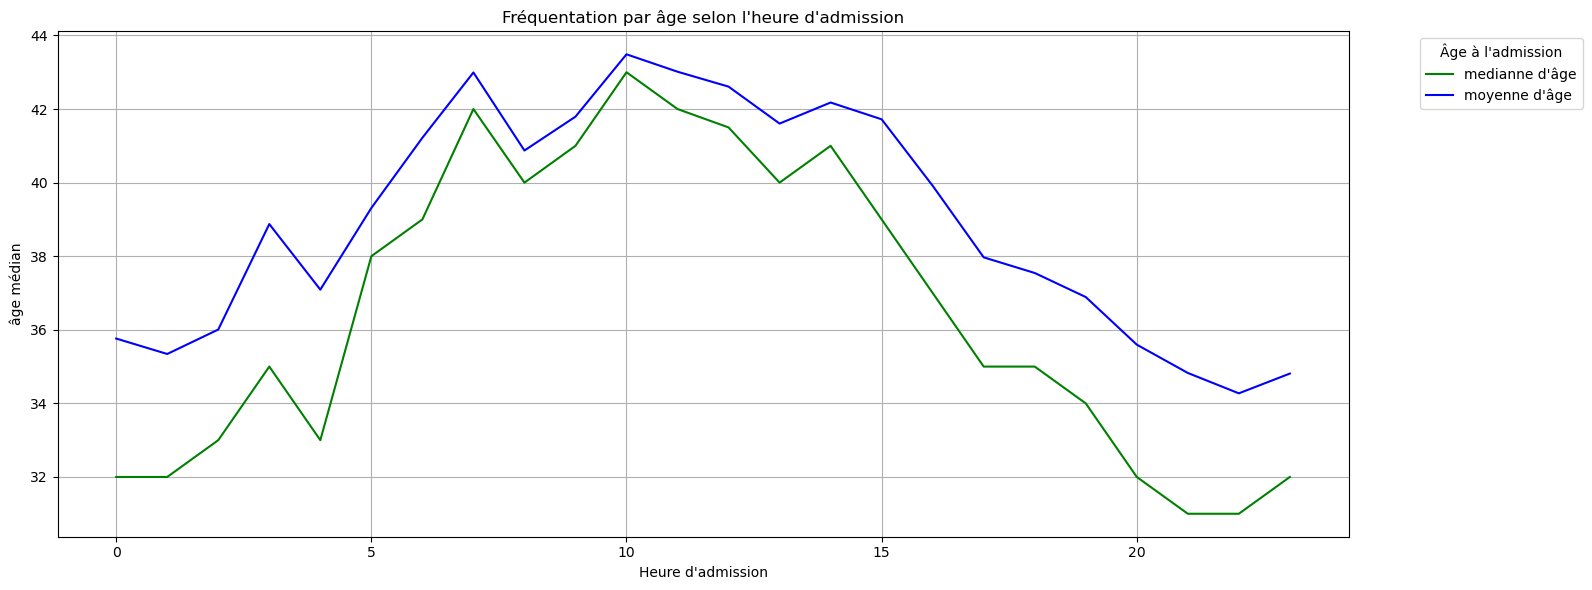

In [16]:
age_medians = masked_df.groupby('heure admission extraite')["age"].median()
age_means = masked_df.groupby('heure admission extraite')["age"].mean()


plt.figure(figsize=(16, 6))

plt.plot(age_medians.index, age_medians, label="medianne d'âge", color="green")
plt.plot(age_means.index, age_means, label="moyenne d'âge", color="blue")

plt.xlabel("Heure d'admission")
plt.ylabel("âge médian")
plt.title("Fréquentation par âge selon l'heure d'admission")
plt.legend(title="Âge à l'admission", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

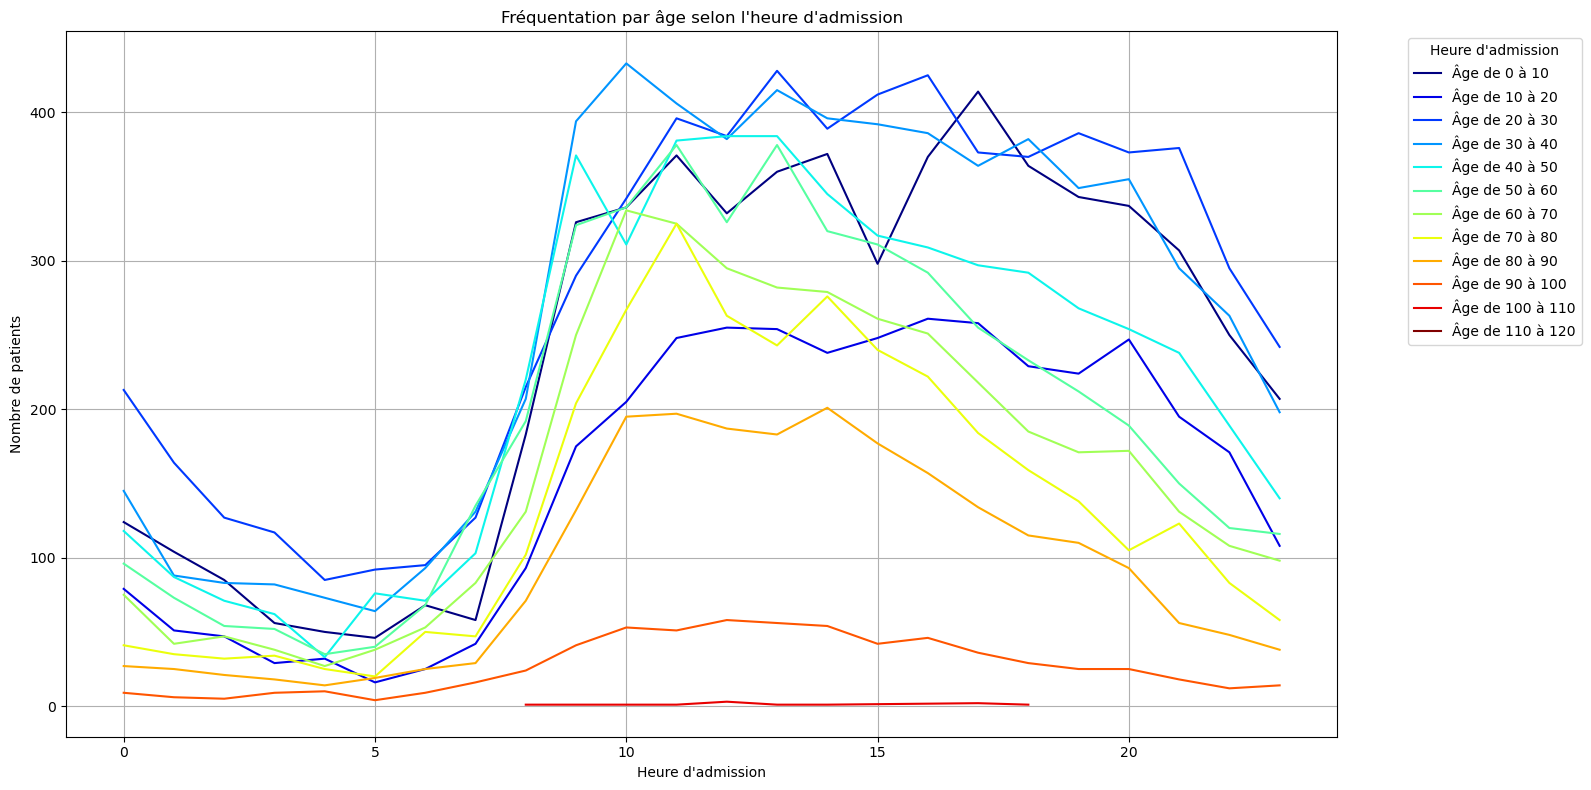

In [17]:
age_tables = [df[(df["age"] < (i+1)*10) & (df["age"] >= i*10)].groupby('heure admission extraite').count() for i in range(12)]

colors = plt.cm.jet(np.linspace(0, 1, 12))

plt.figure(figsize=(16, 8))


for i, table in enumerate(age_tables):
    if not table.empty:
        plt.plot(table.index, table['admission'], label=f"Âge de {i*10} à {(i+1)*10}", color=colors[i])

plt.xlabel("Heure d'admission")
plt.ylabel("Nombre de patients")
plt.title("Fréquentation par âge selon l'heure d'admission")
plt.legend(title="Heure d'admission", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
df.head()


,admission,sortie,date de naissance,spécialité,date admission,heure admission,date sortie,heure sortie,heure admission extraite,jour admission,mois admission,age_days,age
0,2024-01-03 20:11:00,2024-01-04 02:00:00,1995-06-17,CHIR,2024-01-03,1900-01-01 20:11:00,2024-01-04,02:00:00,20,2,1,10427.0,28.0
1,2024-01-03 06:23:00,2024-01-03 07:29:00,1985-12-18,CHIR,2024-01-03,1900-01-01 06:23:00,2024-01-03,07:29:00,6,2,1,13895.0,38.0
2,2024-01-01 00:39:00,2024-01-01 03:09:00,2021-08-05,PED,2024-01-01,1900-01-01 00:39:00,2024-01-01,03:09:00,0,0,1,879.0,2.0
3,2024-01-01 22:31:00,2024-01-02 01:44:00,1942-06-26,MED,2024-01-01,1900-01-01 22:31:00,2024-01-02,01:44:00,22,0,1,29774.0,81.0
4,2024-01-02 23:41:00,2024-01-03 04:30:00,1983-06-27,CHIR,2024-01-02,1900-01-01 23:41:00,2024-01-03,04:30:00,23,1,1,14799.0,40.0


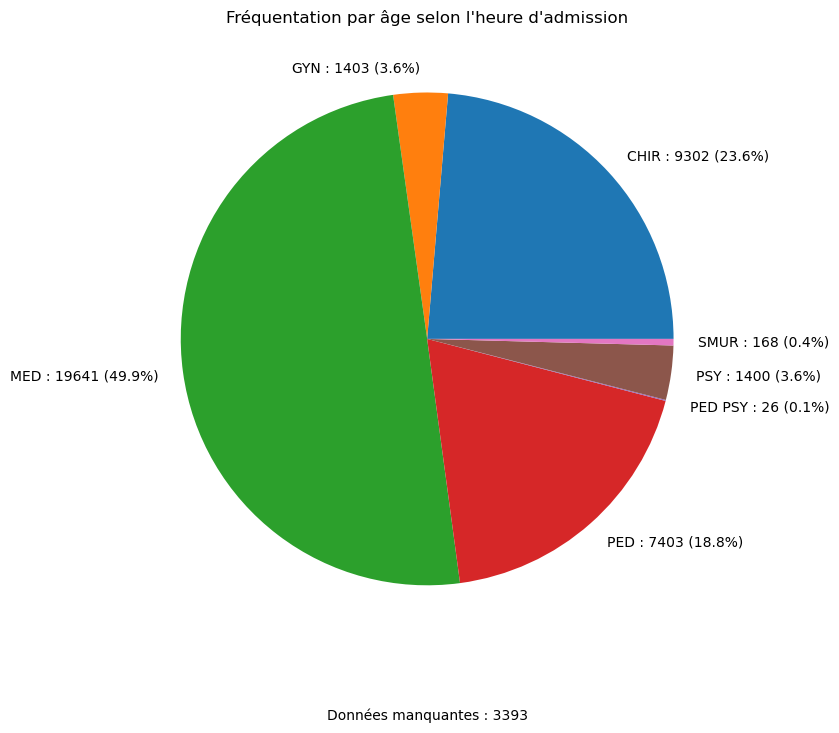

In [19]:
specialties = {
    "CHIR": "CHIR",
    "CHIR PLAS": "CHIR",
    "ORTHO": "CHIR",
    "ORTHO GER": "CHIR",
    "GYN": "GYN",
    "PED": "PED",
    "PSY": "PSY",
    "PED PSY": "PED PSY",
    "SMUR": "SMUR"
}

specialties_df = df[df["spécialité"].notna()].copy()

specialties_df["spécialité_renommee"] = specialties_df["spécialité"].apply(lambda x: specialties[x] if x in specialties else "MED")

pie_table = specialties_df.groupby("spécialité_renommee").count()["admission"]
plt.figure(figsize=(16, 8))

plt.pie(pie_table, labels=[f"{i} : {pie_table[i]} ({round(100*pie_table[i]/len(specialties_df), 1)}%)" for i in pie_table.index])


plt.title("Fréquentation par âge selon l'heure d'admission")

plt.annotate(f"Données manquantes : {len(df) - len(specialties_df)}", 
            xy=(0.5, -0.1), xycoords="axes fraction",
            ha="center", va="top", fontsize=10, color="black")
plt.show()

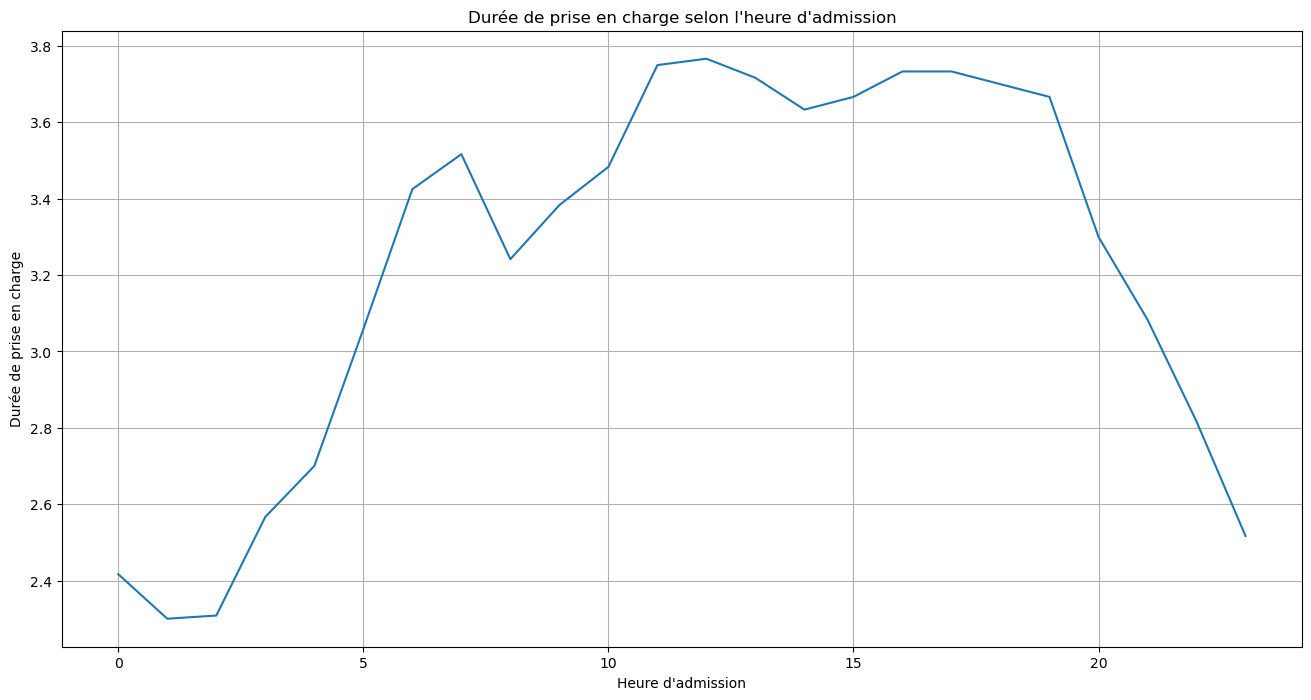

In [20]:
df["durée_aux_urgences"] = (df["sortie"] - df["admission"]).dt.seconds/3600
duree_urg = df.groupby("heure admission extraite")["durée_aux_urgences"].median()

plt.figure(figsize=(16, 8))
plt.plot(duree_urg.index, duree_urg)
plt.xlabel("Heure d'admission")
plt.ylabel("Durée de prise en charge")
plt.title("Durée de prise en charge selon l'heure d'admission")
plt.grid(True)
plt.show()

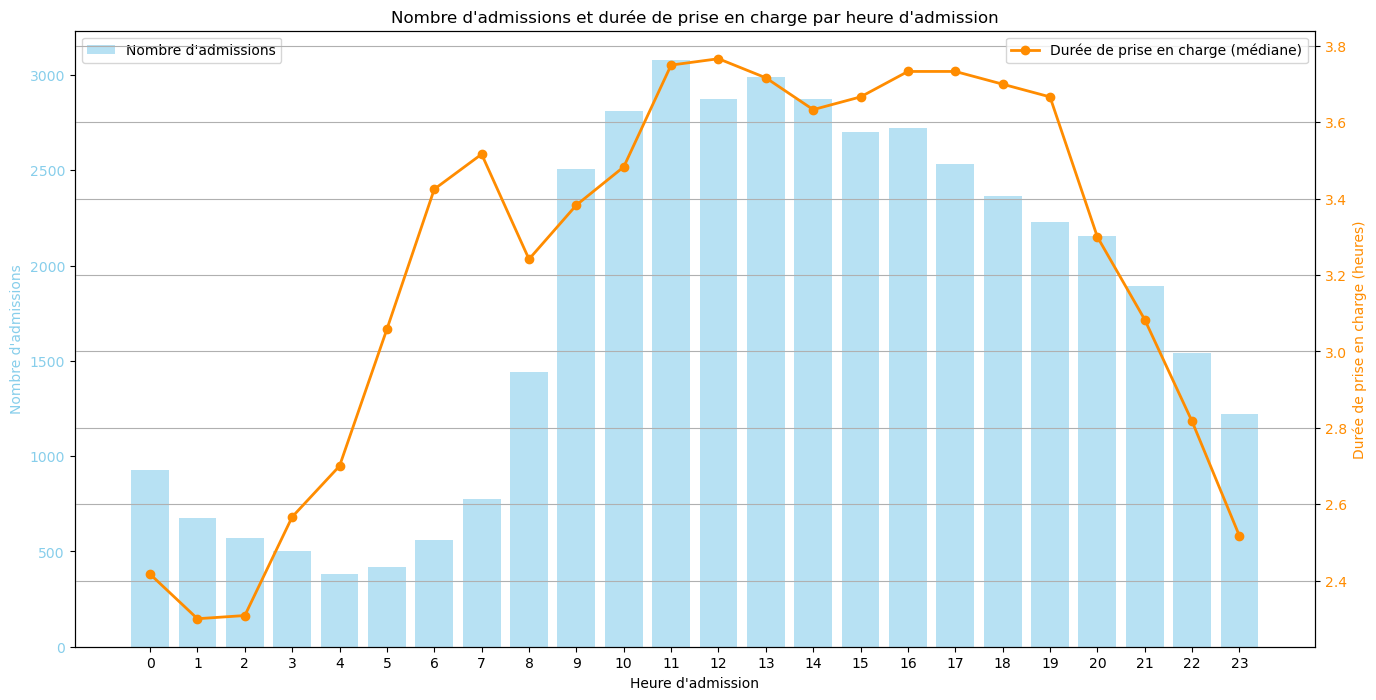

In [21]:
fig, ax1 = plt.subplots(figsize=(16, 8))

color_bar = 'skyblue'
ax1.bar(nombre_par_heure.index, nombre_par_heure.values, color=color_bar, alpha=0.6, label="Nombre d'admissions")
ax1.set_xlabel("Heure d'admission")
ax1.set_ylabel("Nombre d'admissions", color=color_bar)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_xticks(range(0, 24))

ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color_line = 'darkorange'
ax2.plot(duree_urg.index, duree_urg, color=color_line, marker='o', linewidth=2,
         label="Durée de prise en charge (médiane)")
ax2.set_ylabel("Durée de prise en charge (heures)", color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.legend(loc='upper right')

# Titre et grille
plt.title("Nombre d'admissions et durée de prise en charge par heure d'admission")
plt.grid(True)
plt.show()



In [22]:
graph_data = np.array([nombre_par_heure/366, mean_occupancy_each_hour, duree_urg])
df_heatmap = pd.DataFrame(graph_data, index=['Admissions', 'Fréquentation', 'Durée médiane'])
def normalize_row(row):
    return (row - row.min()) / (row.max() - row.min())

df_norm = df_heatmap.apply(normalize_row, axis=1)

plt.figure(figsize=(16, 6))
# On affiche la heatmap des valeurs normalisées
sns.heatmap(df_norm, cmap="viridis", annot=df.round(2), fmt="", cbar=True)
plt.title("Heatmap des indicateurs normalisés\n(annotations : valeurs originales)")
plt.xlabel("Heure de la journée")
plt.ylabel("Indicateur")
plt.show()


ValueError: `data` and `annot` must have same shape.

<Figure size 1600x600 with 0 Axes>

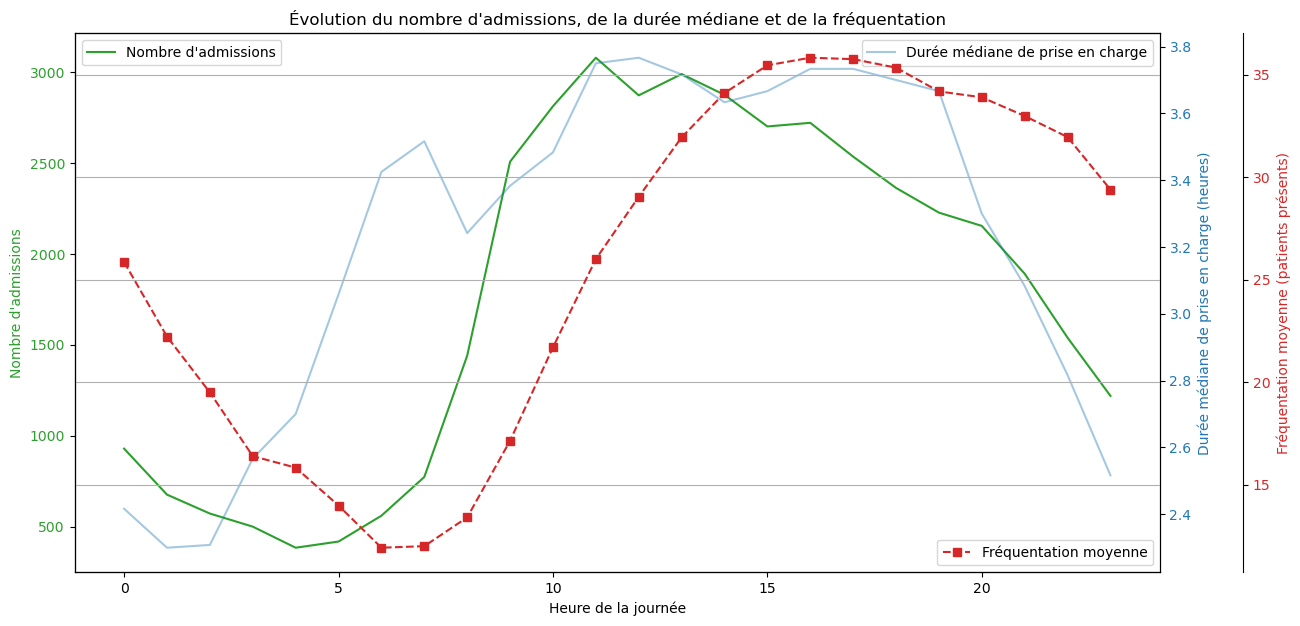

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Tracé du nombre d'admissions (axe gauche) ---
color1 = 'tab:green'
ax1.set_xlabel("Heure de la journée")
ax1.set_ylabel("Nombre d'admissions", color=color1)
ax1.plot(nombre_par_heure.index, nombre_par_heure.values, color=color1, label="Nombre d'admissions")
ax1.tick_params(axis='y', labelcolor=color1)

# --- Ajout du second axe (durée de prise en charge) ---
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel("Durée médiane de prise en charge (heures)", color=color2)
ax2.plot(duree_urg.index, duree_urg, color=color2, alpha=0.4, label="Durée médiane de prise en charge")
ax2.tick_params(axis='y', labelcolor=color2)

# --- Ajout du troisième axe (fréquentation moyenne) ---
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Décaler le 3e axe pour éviter qu'il se superpose au second
color3 = 'tab:red'
ax3.set_ylabel("Fréquentation moyenne (patients présents)", color=color3)
ax3.plot(mean_occupancy_each_hour.index, mean_occupancy_each_hour, marker='s', linestyle='--', color=color3, label="Fréquentation moyenne")
ax3.tick_params(axis='y', labelcolor=color3)

# --- Ajout de la légende ---
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

plt.title("Évolution du nombre d'admissions, de la durée médiane et de la fréquentation")
plt.grid(True)
plt.show()

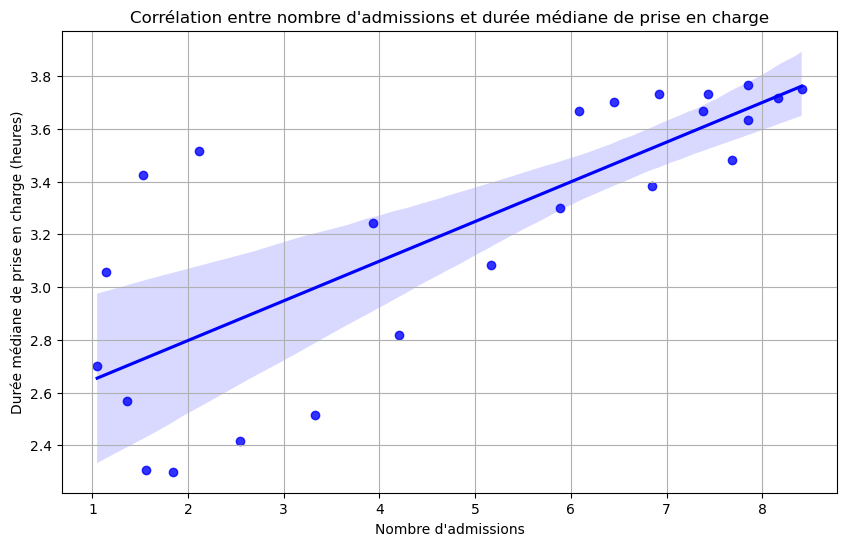

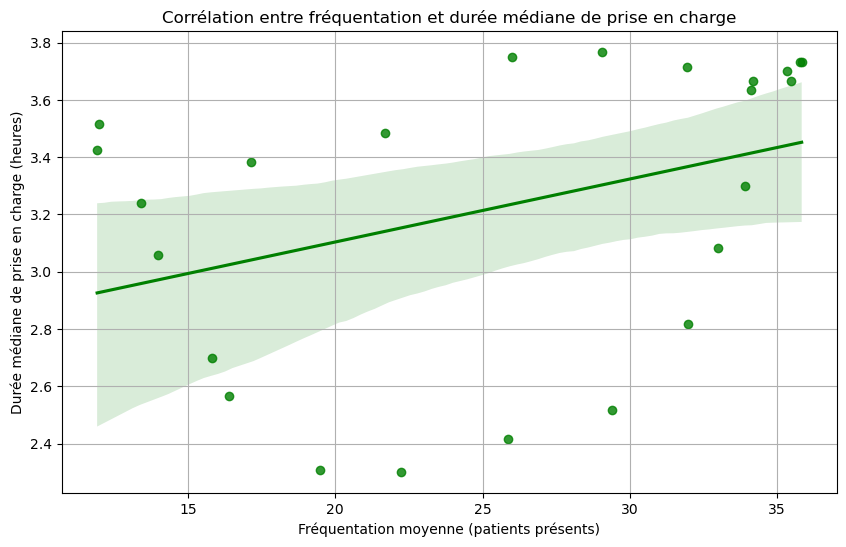

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=nombre_par_heure/366, y=duree_urg, marker='o', color='blue', ci=95)
plt.xlabel("Nombre d'admissions")
plt.ylabel("Durée médiane de prise en charge (heures)")
plt.title("Corrélation entre nombre d'admissions et durée médiane de prise en charge")
plt.grid(True)
plt.show()

# Vous pouvez faire de même pour la fréquentation :
plt.figure(figsize=(10,6))
sns.regplot(x=mean_occupancy_each_hour, y=duree_urg, marker='o', color='green', ci=95)
plt.xlabel("Fréquentation moyenne (patients présents)")
plt.ylabel("Durée médiane de prise en charge (heures)")
plt.title("Corrélation entre fréquentation et durée médiane de prise en charge")
plt.grid(True)
plt.show()

In [ ]:
df.head()

,admission,sortie,date de naissance,spécialité,date admission,heure admission,date sortie,heure sortie,heure admission extraite,jour admission,mois admission,age_days,age,durée_aux_urgences
0,2024-01-03 20:11:00,2024-01-04 02:00:00,1995-06-17,CHIR,2024-01-03,1900-01-01 20:11:00,2024-01-04,02:00:00,20,2,1,10427.0,28.0,5.816667
1,2024-01-03 06:23:00,2024-01-03 07:29:00,1985-12-18,CHIR,2024-01-03,1900-01-01 06:23:00,2024-01-03,07:29:00,6,2,1,13895.0,38.0,1.100000
2,2024-01-01 00:39:00,2024-01-01 03:09:00,2021-08-05,PED,2024-01-01,1900-01-01 00:39:00,2024-01-01,03:09:00,0,0,1,879.0,2.0,2.500000
3,2024-01-01 22:31:00,2024-01-02 01:44:00,1942-06-26,MED,2024-01-01,1900-01-01 22:31:00,2024-01-02,01:44:00,22,0,1,29774.0,81.0,3.216667
4,2024-01-02 23:41:00,2024-01-03 04:30:00,1983-06-27,CHIR,2024-01-02,1900-01-01 23:41:00,2024-01-03,04:30:00,23,1,1,14799.0,40.0,4.816667


116.76502732240438 2024-01-29 00:00:00 166 2024-07-14 00:00:00 76
count    366.000000
mean     116.765027
std       15.181080
min       76.000000
25%      106.000000
50%      116.000000
75%      126.000000
max      166.000000
Name: admission, dtype: float64


<Axes: xlabel='date admission'>

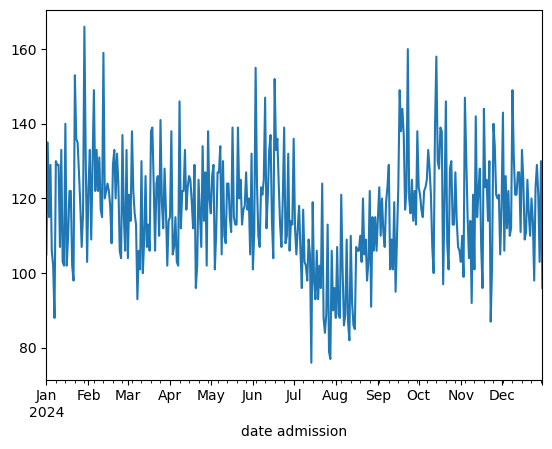

In [ ]:
grouped_by_date = df.groupby(["date admission"]).count()["admission"]

print(grouped_by_date.describe())

grouped_by_date.plot(kind="line")


c:\Users\Martin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


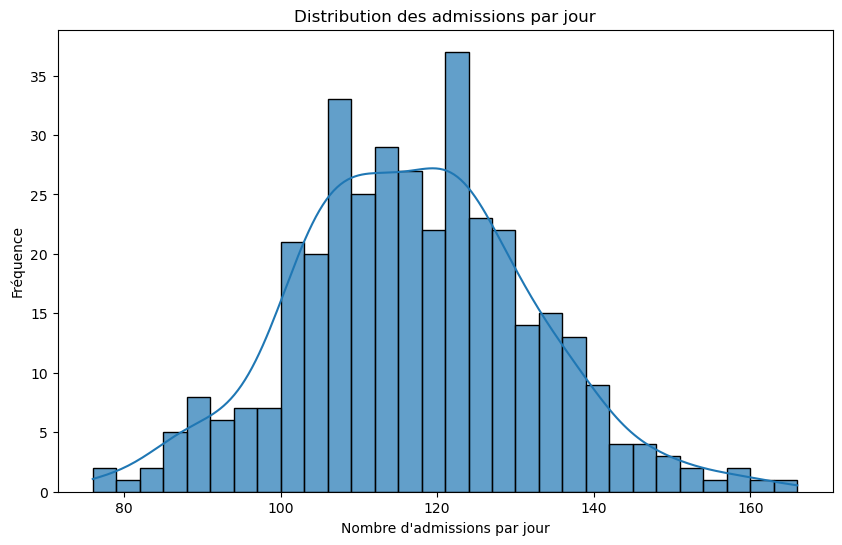

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(grouped_by_date, bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel("Nombre d'admissions par jour")
plt.ylabel("Fréquence")
plt.title("Distribution des admissions par jour")

plt.show()

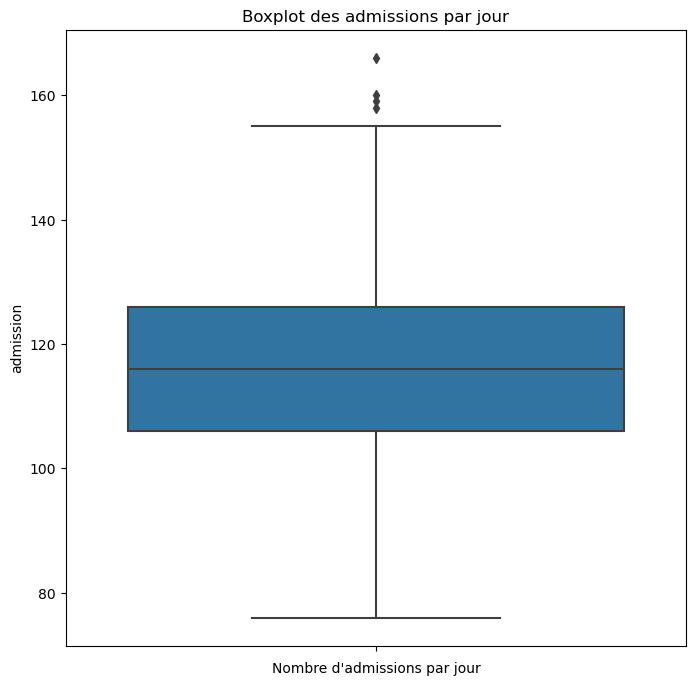

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(y=grouped_by_date)
plt.title("Boxplot des admissions par jour")
plt.xlabel("Nombre d'admissions par jour")
plt.show()